# Prosper Load Data Analysis

### Data Information:
There are 113,937 loans in the dataset with 81 features. Most variables are both numeric and categorical in nature.

The dataset features can be split into two main categories: Borrower information & Loan performance information.


This analysis dedicates to figure out the impacts to the loans by different variables, such as:

How credit ratings affect a loan?

What is the most popular income range?

What are estimated returns for investors?

And how do the debt-income ratios look like? etc.

# Univariable Analysis

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

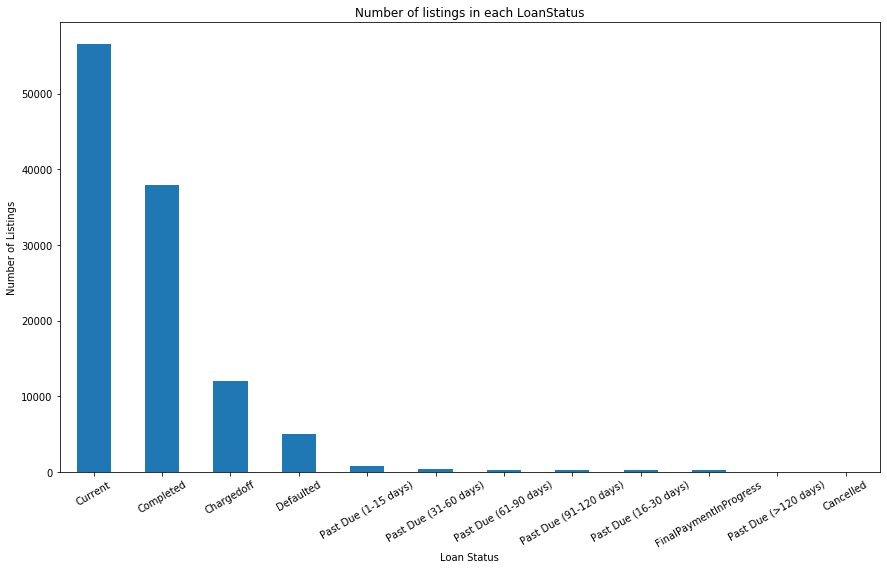

In [8]:
# Making bar-chart to see the number of each loan status
Status=df.LoanStatus.value_counts()
color = sns.color_palette()[0]

plt.figure(figsize=(14.70, 8.27))
Status.plot(kind='bar', color=color);

plt.title('Number of listings in each LoanStatus');
plt.xlabel('Loan Status');
plt.ylabel('Number of Listings');

plt.xticks(rotation=30)

## What are the fractions of each loan status?

## Finding: 

## The bar-chart above indicates that the numbers of each status of loans, of which about 12000 are Charged-off, namely 21% are unlikely to be collected, while about 5000 are Defaulted, it takes about 9%.

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

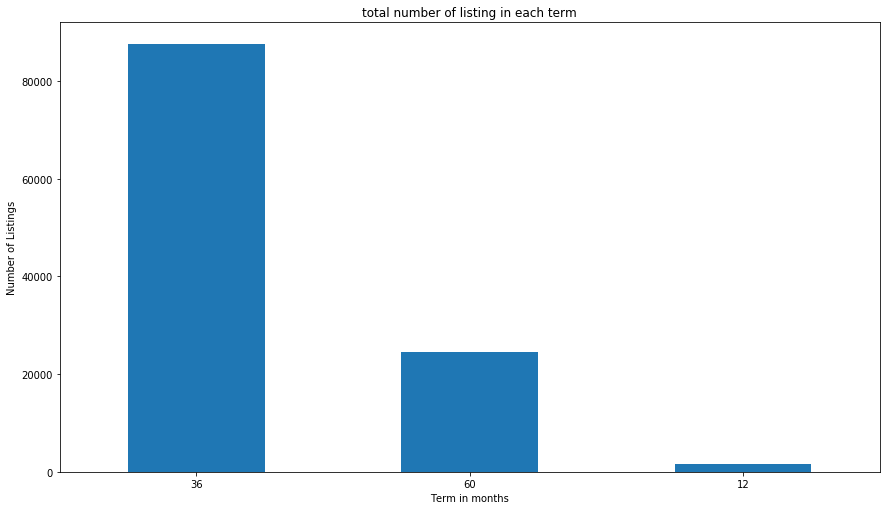

In [9]:
# Term Distribution
term=df.Term.value_counts()
color = sns.color_palette()[0]

plt.figure(figsize=(14.70, 8.27))
term.plot(kind='bar', color=color);

plt.title('total number of listing in each term');
plt.xlabel('Term in months');
plt.ylabel('Number of Listings');

plt.xticks(rotation=0)

## What is the term preference?

## Finding:

## The bar-chart above shows people prefer loans with 36 month payment range.

Text(0.5, 1.0, 'Distribution of Borrower Debt to Income Ratio')

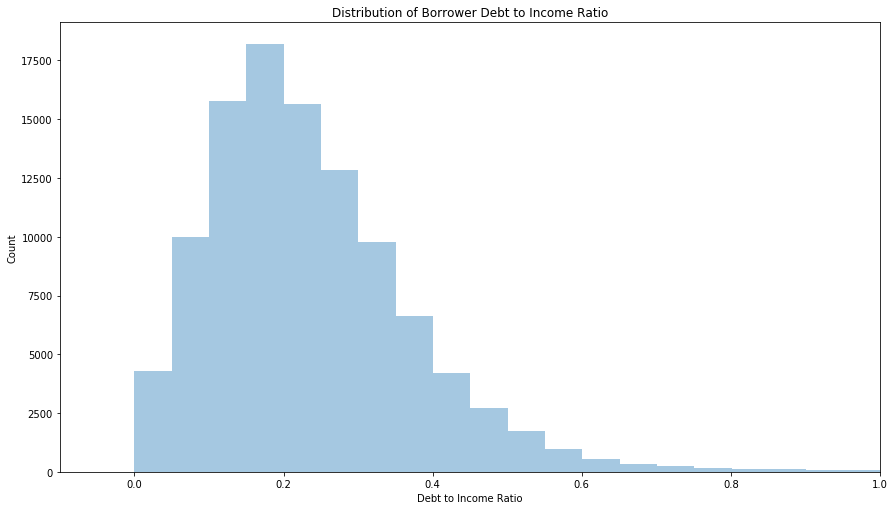

In [12]:
# Plotting Debt-Income Ratio
plt.figure(figsize = [14.70, 8.27])
sns.distplot(df.DebtToIncomeRatio, kde = False, bins = 200)
plt.xlim(-.1, 1)
plt.xlabel('Debt to Income Ratio')
plt.ylabel('Count')
plt.title('Distribution of Borrower Debt to Income Ratio')

## What is the distribution of debt-income ratio?

## Finding:

## Most loan takers have a debt-income ratio of 20%, the distribution skews to the right.

# Bivariable Analysis

Text(0.5, 1.0, 'Number of investors vs. BorrowerRate')

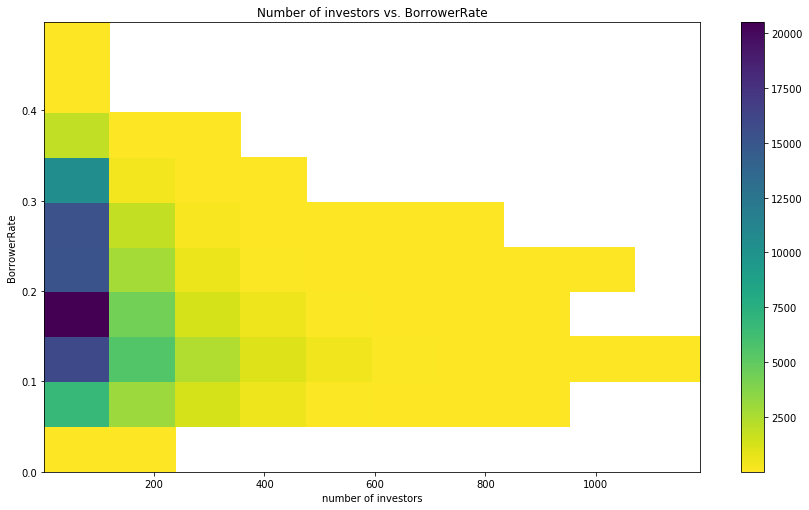

In [13]:
# Plotting the number of investor and borrow rate
df2 = df.loc[df.Investors.notnull()]

# plots the hist2d graph 
plt.figure(figsize = [14.70, 8.27])
plt.hist2d(data=df2, x='Investors', y='BorrowerRate', cmap = 'viridis_r', cmin = 0.5);
plt.colorbar()

plt.xlabel('number of investors')
plt.ylabel('BorrowerRate')
plt.title('Number of investors vs. BorrowerRate')

## What is the most popular borrow rate? 
## How does the number of investors distribute?

## Findling:
## The borrow rates are centered from 0.1 to 0.3, while the investor number is more spread out.

Text(0, 0.5, 'Borrower Income Range')

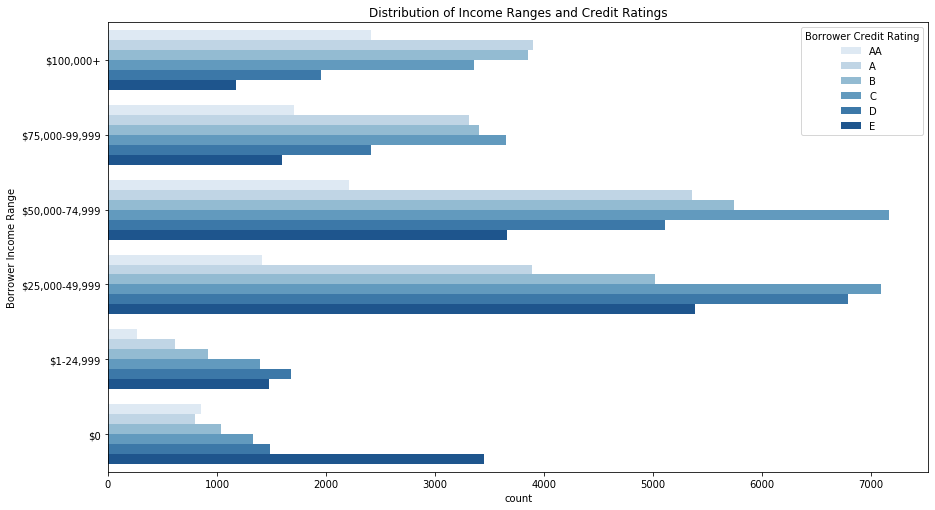

In [15]:
# Clustered bar chart of Credit Rating and Income Range
plt.figure(figsize = [14.70,8.27])

ax = sns.countplot(data = df, y = 'IncomeRange', hue = 'ProsperRatingCombined',
                   palette = 'Blues')

ax.legend(title = 'Borrower Credit Rating')
plt.title('Distribution of Income Ranges and Credit Ratings')
plt.ylabel('Borrower Income Range')

## How do credit ratings and income range relate to each other?

## Finding:

## Most of the loan takers are set in the income range of 25000 to 74999, while with lower rating scores. Except for the 75000 100000 session.

# Multivariable Analysis

Text(0.5, 1, 'Heatmap of Median Estimated Returns by Credit Rating and Income Range')

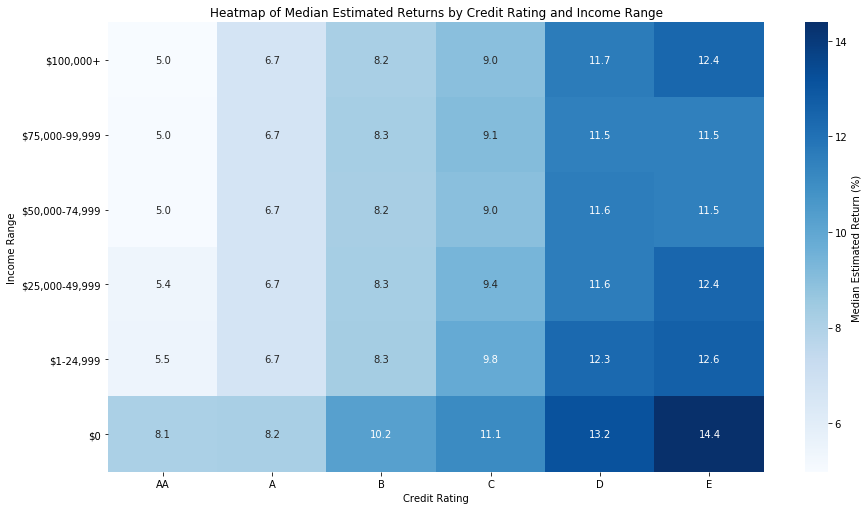

In [16]:
plt.figure(figsize = [14.70,8.27])

cat_med = df.groupby(['ProsperRatingCombined', 'IncomeRange']).median()['EstimatedReturn']*100
cat_med = cat_med.reset_index(name = 'EstimatedReturnMedian')
cat_med = cat_med.pivot(index = 'IncomeRange', columns = 'ProsperRatingCombined', values = 'EstimatedReturnMedian')

sns.heatmap(cat_med, annot = True, fmt = '.1f', cmap = "Blues", cbar_kws = {'label' : 'Median Estimated Return (%)'})
plt.xlabel('Credit Rating')
plt.ylabel('Income Range')
plt.title('Heatmap of Median Estimated Returns by Credit Rating and Income Range')

## How does the relationship among income, credit ratings and estimated return look like?

## Finding:

## From the heatmap we can see that as the rating goes higher, the estimated return goes lower, so does income range, but not as obvious as credit rating does.